In [1]:
import cv2 # must manually add to anaconda
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab as py
import math
from scipy import ndimage
from PIL import Image
import statistics

%matplotlib inline

In [2]:
#converts image to grayscale

frame = 'Frames/frame0.png' # NOTE: Be aware of .png/.jpg -- need png for filtering

img = Image.open(frame).convert('LA')

idx = frame.index('.')
frame_grayscale = frame[:idx] + '_grayscale.png'

img.save(frame_grayscale)

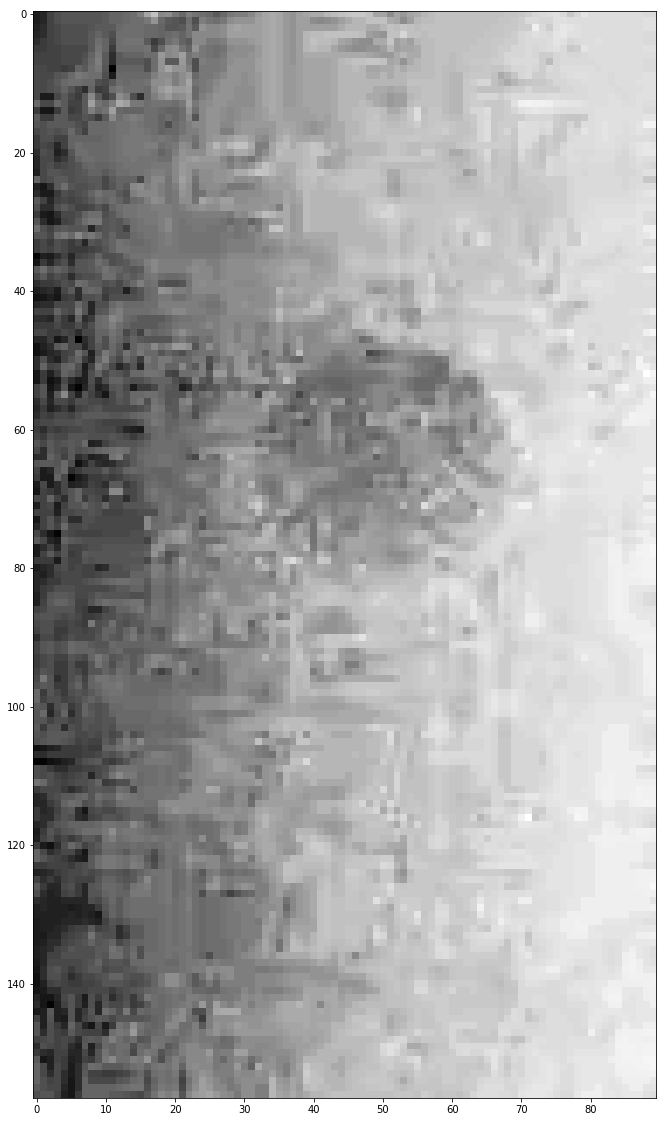

In [3]:
# Creates array of grayscale image
img1 = mpimg.imread(frame_grayscale)
img1 = img1[:,:,0]
arr_img1 = np.array(img1, 'double')
#print(arr_img1)
fig = py.figure(figsize=(18, 20))
imgplot = py.imshow(img1, cmap=py.cm.Greys_r)

mean before centering: 1.3888699592588956e-05
mean after centering: 0.0


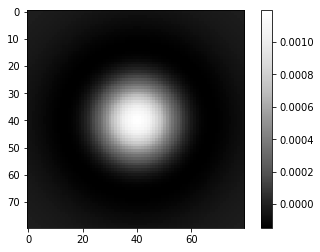

In [4]:
# Below creates gaussian filter
# Need to run this to run centerPixel
def gaussianCalc(x, y, sigma, k):
    return (((1/(2*math.pi*(sigma**2)))*(math.exp((-(x**2+y**2))/(2*(sigma**2)))))
        -((1/(2*math.pi*(k**2)*(sigma**2)))*math.exp((-(x**2+y**2))/(2 *(k**2)*(sigma**2)))))

def gaussianFilter(sizeX=16, sizeY=16, sigma = 10, k = 2): # k is a factor difference between the gaussians
    return [[gaussianCalc(x - 40, y - 40, sigma, k) # NOTE: 40 refers to tumor size in X and Y directions
        for x in range(sizeX)] for y in range(sizeY)]


gaussian_filter = gaussianFilter(sizeX = 80, sizeY = 80) # 80 comes from 40 * 2 (refer to above comment)

print('mean before centering:',np.mean(gaussian_filter))
gaussian_filter = np.array(gaussian_filter)
pos_ind = gaussian_filter >= 0
neg_ind = gaussian_filter < 0
pos_sum = np.sum(gaussian_filter[pos_ind])
neg_sum = np.sum(gaussian_filter[neg_ind])
gaussian_filter[neg_ind] = - pos_sum / neg_sum * gaussian_filter[neg_ind]
gaussian_filter = list(gaussian_filter)
print('mean after centering:',np.mean(gaussian_filter))

py.imshow(gaussian_filter, cmap=py.cm.Greys_r)

py.colorbar()


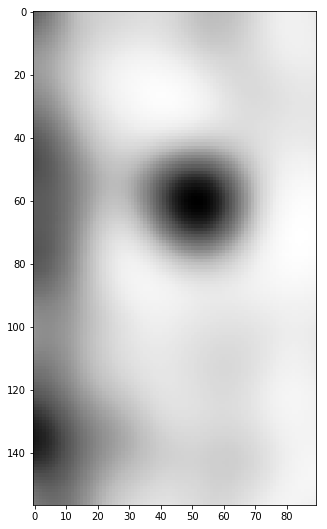

In [5]:
# applies gaussian filter
# Note: gaussian filter was used essentially as a disk filter and not as an edge detector
# if you want an edge detector, you would have to change the sizes of x/y in above cell
img_gauss = ndimage.convolve(img1.astype(float),
                                gaussian_filter, mode='nearest', cval=0.0)

fig = py.figure(figsize=(18, 20))
fig.add_subplot(2,1,1)
py.imshow(img_gauss, cmap=py.cm.Greys_r)

idx = frame.index('.')
frame_gaussian = frame[:idx] + '_gaussian.png'


py.imsave(frame_gaussian, img_gauss, cmap=py.cm.Greys_r)

In [6]:
#gets pixel values from frame
img = Image.open(frame_gaussian)

img.getcolors()

[(18, (255, 255, 255, 255)),
 (60, (253, 253, 253, 255)),
 (77, (251, 251, 251, 255)),
 (79, (249, 249, 249, 255)),
 (116, (247, 247, 247, 255)),
 (154, (245, 245, 245, 255)),
 (237, (243, 243, 243, 255)),
 (210, (241, 241, 241, 255)),
 (277, (239, 239, 239, 255)),
 (306, (237, 237, 237, 255)),
 (148, (235, 235, 235, 255)),
 (165, (233, 233, 233, 255)),
 (309, (231, 231, 231, 255)),
 (344, (229, 229, 229, 255)),
 (133, (227, 227, 227, 255)),
 (164, (225, 225, 225, 255)),
 (163, (223, 223, 223, 255)),
 (359, (221, 221, 221, 255)),
 (197, (219, 219, 219, 255)),
 (150, (217, 217, 217, 255)),
 (227, (215, 215, 215, 255)),
 (126, (213, 213, 213, 255)),
 (136, (211, 211, 211, 255)),
 (107, (209, 209, 209, 255)),
 (210, (207, 207, 207, 255)),
 (71, (205, 205, 205, 255)),
 (74, (203, 203, 203, 255)),
 (51, (201, 201, 201, 255)),
 (69, (199, 199, 199, 255)),
 (50, (197, 197, 197, 255)),
 (53, (195, 195, 195, 255)),
 (117, (193, 193, 193, 255)),
 (64, (191, 191, 191, 255)),
 (48, (189, 189, 189,

In [7]:
def findPixelUpperbound(file, pixel_upperbound): # pixel upper bound collects darker pixels than specified bound
    pixel_list = []
    for x in range(file.size[0]):
       for y in range(file.size[1]):
           pixel = file.getpixel((x, y))[0]
           if pixel < pixel_upperbound:
               pixel_list.append((x,y))
    return pixel_list


In [8]:
# below creates list of x/y pixels so long as i[0] > 10 -- aka as long as x/y aren't in first 10 pixels on left of image
# probably need to modify this bound with being a certain distance away from edge of tumor if doing trace
desired_pixels = findPixelUpperbound(img, 20)

x_pixels = [i[0] for i in desired_pixels if i[0] > 10] # NOTE: DARKEST PIXELS AREN'T ALWAYS CENTER OF TUMOR 
y_pixels = [i[1] for i in desired_pixels if i[0] > 10]

print (x_pixels, y_pixels)

[46, 46, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56] [59, 60, 57, 58, 59, 60, 61, 62, 63, 56, 57, 58, 59, 60, 61, 62, 63, 64, 56, 57, 58, 59, 60, 61, 62, 63, 64, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 57, 58, 59, 60, 61, 62, 63, 64, 58, 59, 60, 61, 62, 63]


In [9]:
center_x = int(statistics.median(x_pixels))
center_y = int(statistics.median(y_pixels))

print (center_x, center_y)

51 60


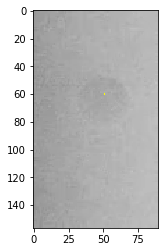

In [10]:
#plots a single pixel at the center point
img_center = Image.open(frame)

pixelMap = img_center.load()

pixelMap[center_x, center_y] = (254, 255, 0, 255) # gold

py.imshow(img_center)

idx = frame.index('.')
frame_center = frame[:idx] + '_center.png'


#py.imsave(frame_center, img)

In [11]:
def centerPixel (file):
    frame = file #TWEAK THIS-----------------------------------------!
    
    # Cell 2
    img_original = Image.open(file).convert('LA')
    idx = frame.index('.')
    frame_grayscale = frame[:idx] + '_grayscale.png'
    idx = frame.index('/')
    frame_grayscale = frame_grayscale[:idx] + "/Grayscale" + frame_grayscale[idx:]
    
    img_original.save(frame_grayscale)
    
    # Cell 3
    img_grayscale = mpimg.imread(frame_grayscale)
    img_grayscale = img_grayscale[:,:,0] #why does this lower quality of image?
    arr_img_grayscale = np.array(img_grayscale, 'double')
    # print(arr_img1)
    #fig = py.figure(figsize=(18, 20)) HERE
    #imgplot = py.imshow(img1, cmap=py.cm.Greys_r)
    
    # Cell 5
    img_gauss = ndimage.convolve(img_grayscale.astype(float),
                                gaussian_filter, mode='nearest', cval=0.0)
    #fig = py.figure(figsize=(18, 20)) HERE
    #fig.add_subplot(2,1,1) HERE
    #py.imshow(img_gauss, cmap=py.cm.Greys_r)
    idx = frame.index('.')
    frame_gaussian = frame[:idx] + '_gaussian.png'
    idx = frame.index('/')
    frame_gaussian = frame_gaussian[:idx] + "/Gaussian" + frame_gaussian[idx:]
    py.imsave(frame_gaussian, img_gauss, cmap=py.cm.Greys_r)
    
    # Cell 6
    img_center = Image.open(frame_gaussian) 
    
    # Cell 7
    desired_pixels = findPixelUpperbound(img_center, 20)
    
    # Cell 8
    x_pixels = [i[0] for i in desired_pixels if i[0] > 10]
    y_pixels = [i[1] for i in desired_pixels if i[0] > 10]
    
    # Cell 9/10ish
    # this line is new
    img_center = Image.open(file)
    pixelMap = img_center.load()
    
    if (not (len(x_pixels) == 0)): #ensures it's not empty -- if it is, no center pixel is identified
        center_x = int(statistics.median(x_pixels))
        center_y = int(statistics.median(y_pixels))
        # below plots 9 pixels rather than 1 center pixel for easier viewing
        pixelMap[center_x+1, center_y] = (254, 255, 0, 255) 
        pixelMap[center_x-1, center_y] = (254, 255, 0, 255)
        pixelMap[center_x+1, center_y+1] = (254, 255, 0, 255) 
        pixelMap[center_x-1, center_y-1] = (254, 255, 0, 255)
        pixelMap[center_x, center_y] = (254, 255, 0, 255) 
        pixelMap[center_x, center_y+1] = (254, 255, 0, 255) 
        pixelMap[center_x, center_y-1] = (254, 255, 0, 255)
        pixelMap[center_x-1, center_y+1] = (254, 255, 0, 255) 
        pixelMap[center_x+1, center_y-1] = (254, 255, 0, 255)
        
    idx = frame.index('.')
    frame_center = frame[:idx] + '_center.png'
    idx = frame.index('/')
    frame_center = frame_center[:idx] + "/Center" + frame_center[idx:]
    py.imsave(frame_center, img_center) # change img_center?
        
        

In [12]:
file = "Frames/frame0.png"

centerPixel(file)

In [13]:
for i in range(80):
    file = "Frames/frame%d.png" % i
    centerPixel(file)

In [14]:
# You can stop here and go on to Tracking Tumor
# below is code working towards generic filter

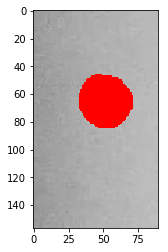

In [15]:
frame = 'Frames/frame0_filter.jpg' #'Full Frames/fullframe0.png'

img = Image.open(frame)

py.imshow(img)

In [ ]:
def findPixelValue(file, r, g, b): # this is for collecting pixel tracing
    pixel_list = []
    for x in range(file.size[0]):
       for y in range(file.size[1]):
           pixel = file.getpixel((x, y))
           if (abs(pixel[0] - r) < 5) and(abs(pixel[1] - g)  < 5) and (abs(pixel[2] - b) < 5):
            # the subtraction is for a slight buffer in pixel value differences based on image editing software
            # i.e. if pixel values are approx equal to r,g,b values then they are considered
               pixel_list.append([x,y])
    return pixel_list

In [16]:
tumorShape = findPixelValue(img, 254, 0, 0)

In [17]:
# collects the lowest and highest x/y values to later be used in scaling
low = []
high = []


for i in tumorShape:
    if (len(low) == 0 and len(high) == 0):
        low = [i[0], i[1]]
        high = [i[0], i[1]]
    if (i[0] < low[0]):
        low[0] = i[0]
    if (i[1] < low[1]):
        low[1] = i[1]
    if (i[0] > high[0]):
        high[0] = i[0]
    if (i[1] > high[1]):
        high[1] = i[1]
  
        
print(low, high)

[33, 46] [71, 84]


In [18]:
widthX = high[0]-low[0] # 38
widthY = high[1]-low[1] # 38 -- do not have to be equal, happened by chance

print (widthX, widthY)

38 38


In [19]:
genericPlot = [[0 for y in range(widthY + 1)] for x in range(widthX + 1)] # widthX and widthY may potentially be flipped

In [20]:
# Below for loop changes the scale to make the x and y coordinates in the range
# Subtracts the min x and min y value from each item to ensure they are in the range of the array
count = 0
for i in tumorShape:
    scaledX = i[0] - low[0]
    scaledY = i[1] - low[1]
    #print (scaledX, scaledY)
    tumorShape[count] = [scaledX, scaledY]
    count += 1
    

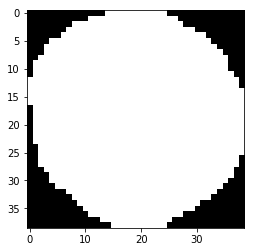

In [21]:
# creates an initial visual of filter
for i in tumorShape:
    x_coord = i[0]
    y_coord = i[1] 
    genericPlot[x_coord][y_coord] = 255 #255 == white


py.imshow(genericPlot, cmap=py.cm.Greys_r)

In [22]:
#filter should have approx equal white and black pixels

whitePixels = 0
for row in genericPlot:
    whitePixels += row.count(255)
    
print (whitePixels)

1196


In [23]:
totPixels = whitePixels * 2 # amount of desired pixels in image aka area
width = totPixels ** .5 # sqrt of area gives width
width = math.ceil(width) # ceiling moves it up to next integer

if (width % 2 == 0):
    width += 1 # filter needs to have an odd width for convolution

print (width)

49


In [24]:
# creates filter with approx equal white/black pixels
genericFilter = [[0 for y in range(width)] for x in range(width)]

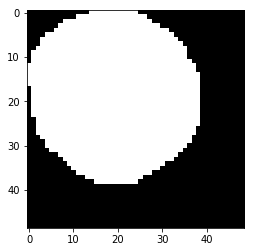

In [25]:
# must re-call this in order to rescale appropriately
tumorShape = findPixelValue(img, 254, 0, 0)

count = 0
for i in tumorShape:
    scaledX = i[0] - low[0]
    scaledY = i[1] - low[1]
    #print (scaledX, scaledY)
    tumorShape[count] = [scaledX, scaledY]
    count += 1

for i in tumorShape:
    x_coord = i[0]
    y_coord = i[1] 
    genericFilter[x_coord][y_coord] = 255 #255 == white


py.imshow(genericFilter, cmap=py.cm.Greys_r)

In [26]:
#filter should now have approx equal white and black pixels

whitePixels = 0
blackPixels = 0
for row in genericFilter:
    whitePixels += row.count(255)
    blackPixels += row.count(0)
    
print (whitePixels, blackPixels)

1196 1205


In [27]:
# below gets center pixel in preparation to center the filter
genericFilter_tumorPixelsX = []
genericFilter_tumorPixelsY = []

countX = 0
countY = 0
for row in genericFilter:
    for pix in row:
        if (pix == 255):
            genericFilter_tumorPixelsX.append(countX)
            genericFilter_tumorPixelsY.append(countY)
        countX += 1
    countX = 0
    countY += 1

centerTumorGenericFilter = [int(statistics.median(genericFilter_tumorPixelsX)), int(statistics.median(genericFilter_tumorPixelsY))]    
genericFilterCenter = int(width/2)


print (centerTumorGenericFilter)
print (genericFilterCenter)

[19, 19]
24


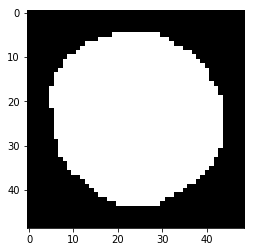

In [28]:
# must re-call this to rescale again
# it scales similarly by subtracting lowest x/y values
# this time it centers it by adding difference of center of tumor and center of filter
genericFilterFinal = [[0 for y in range(width)] for x in range(width)]

tumorShape = findPixelValue(img, 254, 0, 0)

count = 0
for i in tumorShape:
    scaledX = (i[0] - low[0]) + (genericFilterCenter - centerTumorGenericFilter[0])
    scaledY = (i[1] - low[1]) + (genericFilterCenter - centerTumorGenericFilter[1])
    #print (scaledX, scaledY)
    tumorShape[count] = [scaledX, scaledY]
    count += 1

for i in tumorShape:
    x_coord = i[0]
    y_coord = i[1] 
    genericFilterFinal[x_coord][y_coord] = 255 #255 == white


py.imshow(genericFilterFinal, cmap=py.cm.Greys_r)

In [29]:
img = Image.open('Frames/frame0.jpg') # again -- be aware of .jpg/.png
img.save('Frames/frame0.png') # file type needs to be png for convolution

FileNotFoundError: [Errno 2] No such file or directory: 'Frames/frame0.jpg'

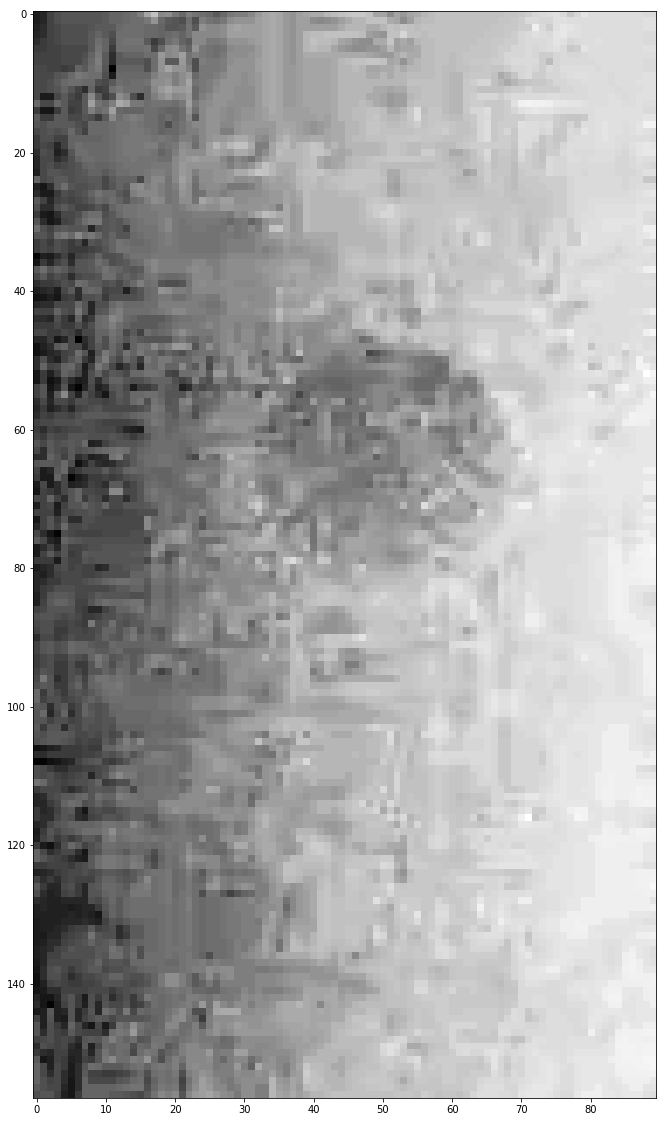

In [30]:
# same code as cell 3
img = mpimg.imread('Frames/frame0.png')
img = img[:,:,0] 
arr_img = np.array(img, 'double')
#print(arr_img)
fig = py.figure(figsize=(18, 20))
imgplot = py.imshow(img, cmap=py.cm.Greys_r) #cmap=py.cm.Greys_r

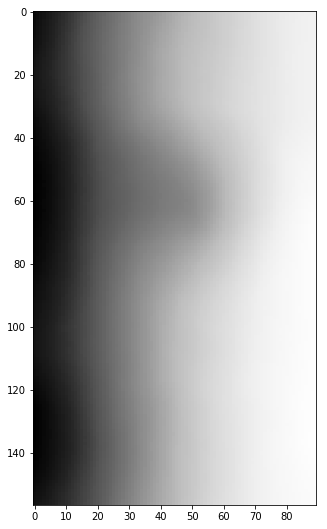

In [31]:
# same code as cell 5
img_genericFilter = ndimage.convolve(img.astype(float),
                                genericFilterFinal, mode='nearest', cval=0.0)

fig = py.figure(figsize=(18, 20))
fig.add_subplot(2,1,1)
py.imshow(img_genericFilter, cmap=py.cm.Greys_r)

#idx = frame.index('.')
#frame_gaussian = frame[:idx] + '_gaussian.png'


#py.imsave(frame_gaussian, img_genericFilter, cmap=py.cm.Greys_r)

In [ ]:
# did not get correct output after applying filter in 2d convolution -- it should be similar to the gaussian filter output